In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
# Importing the dataset
bank=pd.read_csv("C:\\Users\\pradyumn\\Documents\\Assignment\\bank-full.csv",sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198.0,1.0,-1.0,0.0,unknown,no


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25014 entries, 0 to 25013
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        25014 non-null  int64  
 1   job        25014 non-null  object 
 2   marital    25014 non-null  object 
 3   education  25014 non-null  object 
 4   default    25014 non-null  object 
 5   balance    25014 non-null  int64  
 6   housing    25014 non-null  object 
 7   loan       25014 non-null  object 
 8   contact    25014 non-null  object 
 9   day        25014 non-null  int64  
 10  month      25013 non-null  object 
 11  duration   25013 non-null  float64
 12  campaign   25013 non-null  float64
 13  pdays      25013 non-null  float64
 14  previous   25013 non-null  float64
 15  poutcome   25013 non-null  object 
 16  y          25013 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 3.2+ MB


In [4]:
# One-Hot Encoding of categrical variables
data1=pd.get_dummies(bank,columns=['job','marital','education','contact','poutcome','month'])
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_aug,month_jul,month_jun,month_may,month_nov,month_oct
0,58,no,2143,yes,no,5,261.0,1.0,-1.0,0.0,...,0,0,0,1,0,0,0,1,0,0
1,44,no,29,yes,no,5,151.0,1.0,-1.0,0.0,...,0,0,0,1,0,0,0,1,0,0
2,33,no,2,yes,yes,5,76.0,1.0,-1.0,0.0,...,0,0,0,1,0,0,0,1,0,0
3,47,no,1506,yes,no,5,92.0,1.0,-1.0,0.0,...,0,0,0,1,0,0,0,1,0,0
4,33,no,1,no,no,5,198.0,1.0,-1.0,0.0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25009,38,no,595,yes,no,18,70.0,1.0,-1.0,0.0,...,0,0,0,1,0,0,0,0,1,0
25010,47,no,0,no,no,18,103.0,2.0,-1.0,0.0,...,0,0,0,1,0,0,0,0,1,0
25011,56,no,15520,no,no,18,420.0,1.0,-1.0,0.0,...,0,0,0,1,0,0,0,0,1,0
25012,33,no,0,yes,no,18,199.0,1.0,-1.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [5]:
# To see all columns
pd.set_option("display.max.columns", None)
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_aug,month_jul,month_jun,month_may,month_nov,month_oct
0,58,no,2143,yes,no,5,261.0,1.0,-1.0,0.0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,44,no,29,yes,no,5,151.0,1.0,-1.0,0.0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,33,no,2,yes,yes,5,76.0,1.0,-1.0,0.0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,47,no,1506,yes,no,5,92.0,1.0,-1.0,0.0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
4,33,no,1,no,no,5,198.0,1.0,-1.0,0.0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25009,38,no,595,yes,no,18,70.0,1.0,-1.0,0.0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0
25010,47,no,0,no,no,18,103.0,2.0,-1.0,0.0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0
25011,56,no,15520,no,no,18,420.0,1.0,-1.0,0.0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0
25012,33,no,0,yes,no,18,199.0,1.0,-1.0,0.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25014 entries, 0 to 25013
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  25014 non-null  int64  
 1   default              25014 non-null  object 
 2   balance              25014 non-null  int64  
 3   housing              25014 non-null  object 
 4   loan                 25014 non-null  object 
 5   day                  25014 non-null  int64  
 6   duration             25013 non-null  float64
 7   campaign             25013 non-null  float64
 8   pdays                25013 non-null  float64
 9   previous             25013 non-null  float64
 10  y                    25013 non-null  object 
 11  job_admin.           25014 non-null  uint8  
 12  job_blue-collar      25014 non-null  uint8  
 13  job_entrepreneur     25014 non-null  uint8  
 14  job_housemaid        25014 non-null  uint8  
 15  job_management       25014 non-null 

In [7]:
# Custom Binary Encoding of Binary o/p variables 
data1['default'] = np.where(data1['default'].str.contains("yes"), 1, 0)
data1['housing'] = np.where(data1['housing'].str.contains("yes"), 1, 0)
data1['loan'] = np.where(data1['loan'].str.contains("yes"), 1, 0)
data1['y'] = np.where(data1['y'].str.contains("yes"), 1, 0)
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_aug,month_jul,month_jun,month_may,month_nov,month_oct
0,58,0,2143,1,0,5,261.0,1.0,-1.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,44,0,29,1,0,5,151.0,1.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,33,0,2,1,1,5,76.0,1.0,-1.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,47,0,1506,1,0,5,92.0,1.0,-1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
4,33,0,1,0,0,5,198.0,1.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25009,38,0,595,1,0,18,70.0,1.0,-1.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0
25010,47,0,0,0,0,18,103.0,2.0,-1.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0
25011,56,0,15520,0,0,18,420.0,1.0,-1.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0
25012,33,0,0,1,0,18,199.0,1.0,-1.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0


In [8]:
data1.isnull().sum()

age                    0
default                0
balance                0
housing                0
loan                   0
day                    0
duration               1
campaign               1
pdays                  1
previous               1
y                      0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
contact_cellular       0
contact_telephone      0
contact_unknown        0
poutcome_failure       0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0
month_aug              0
month_jul              0
month_jun              0


In [9]:
df=data1.dropna()
df.isnull().sum()
df.dtypes

age                      int64
default                  int32
balance                  int64
housing                  int32
loan                     int32
day                      int64
duration               float64
campaign               float64
pdays                  float64
previous               float64
y                        int32
job_admin.               uint8
job_blue-collar          uint8
job_entrepreneur         uint8
job_housemaid            uint8
job_management           uint8
job_retired              uint8
job_self-employed        uint8
job_services             uint8
job_student              uint8
job_technician           uint8
job_unemployed           uint8
job_unknown              uint8
marital_divorced         uint8
marital_married          uint8
marital_single           uint8
education_primary        uint8
education_secondary      uint8
education_tertiary       uint8
education_unknown        uint8
contact_cellular         uint8
contact_telephone        uint8
contact_

In [12]:
df[['duration']]=df[['duration']].astype(int)
df[['campaign']]=df[['campaign']].astype(int)
df[['pdays']]=df[['pdays']].astype(int)
df[['previous']]=df[['previous']].astype(int)

C:\Users\pradyumn\AppData\Local\Temp\ipykernel_7320\1578722831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['duration']]=df[['duration']].astype(int)
C:\Users\pradyumn\AppData\Local\Temp\ipykernel_7320\1578722831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['campaign']]=df[['campaign']].astype(int)
C:\Users\pradyumn\AppData\Local\Temp\ipykernel_7320\1578722831.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25013 entries, 0 to 25012
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  25013 non-null  int64
 1   default              25013 non-null  int32
 2   balance              25013 non-null  int64
 3   housing              25013 non-null  int32
 4   loan                 25013 non-null  int32
 5   day                  25013 non-null  int64
 6   duration             25013 non-null  int32
 7   campaign             25013 non-null  int32
 8   pdays                25013 non-null  int32
 9   previous             25013 non-null  int32
 10  y                    25013 non-null  int32
 11  job_admin.           25013 non-null  uint8
 12  job_blue-collar      25013 non-null  uint8
 13  job_entrepreneur     25013 non-null  uint8
 14  job_housemaid        25013 non-null  uint8
 15  job_management       25013 non-null  uint8
 16  job_retired          2

In [24]:
# Dividing our data into input and output variables
x=pd.concat([df.iloc[:,0:10],df.iloc[:,11:]],axis=1)
y=df.iloc[:,10]
# Logistic regression model
logreg=LogisticRegression()
logreg.fit(x,y)

C:\Users\pradyumn\pradyumjupypro\example_proj_env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Predictions

In [25]:
# Predict for x dataset
y_pred=logreg.predict(x)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
y_pred_df=pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
25008,0,0
25009,0,0
25010,0,0
25011,0,0


# Testing Model Accuracy

In [27]:
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[23536,   237],
       [  868,   372]], dtype=int64)

In [28]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
(23536+372)/(23536+237+868+372)

0.9558229720545316

In [29]:
# As accuracy = 0.9558, which is greater than 0.5; Thus [:,1] Threshold value>0.5=1 else [:,0] Threshold value<0.5=0 
classifier.predict_proba(x)[:,1] 

array([0.00419636, 0.00383929, 0.00553158, ..., 0.02004154, 0.05382612,
       0.0347978 ])

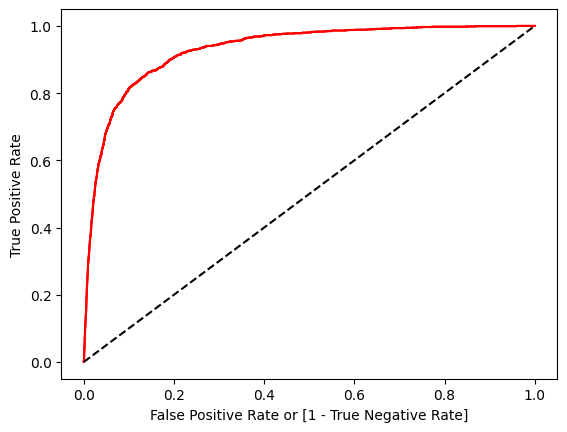

auc accuracy: 0.6450153535523494


In [30]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)